In [1]:
import matplotlib.pyplot as plt
from subprocess import run, PIPE
from time import time
from math import ceil
from pprint import pprint

In [35]:
# sieve_sz = 2000
sieve_sz = 40000
sieve_times_tot = [0 for i in range(14)]
sieve_opt_times = [0 for i in range(14)]
sieve_run_times = [0 for i in range(14)]

fibs_sz = 37
# fibs_sz = 25
fibs_times_tot = [0 for i in range(14)]
fibs_opt_times = [0 for i in range(14)]
fibs_run_times = [0 for i in range(14)]

# fibs_sz = 45
# gcf_sz1 = 6699
#gcf_sz2 = 79002
gcf_sz1 = 931647717 
gcf_sz2 = 8258679
gcf_times_tot = [0 for i in range(14)]
gcf_opt_times = [0 for i in range(14)]
gcf_run_times = [0 for i in range(14)]

repetitions = 50


In [36]:
for j in range(repetitions):
    if j % 5 == 0:
        print(j)
    for i in range(14):
        
        proc = run(["build/ekcc", "-l" + str(i), "testfiles/sieve.ek", str(sieve_sz)], encoding='utf-8', stdout=PIPE)
        # print(proc.stdout)
        opt_time = float(proc.stdout.split('\n')[1].split(' ')[2])
        exec_time = float(proc.stdout.split('\n')[4].split(' ')[2])
        sieve_times_tot[i] += opt_time + exec_time
        sieve_opt_times[i] += opt_time
        sieve_run_times[i] += exec_time
        
        proc = run(["build/ekcc", "-l" + str(i), "testfiles/fibs.ek", str(fibs_sz)], encoding='utf-8', stdout=PIPE)
        # print(proc.stdout)
        opt_time = float(proc.stdout.split('\n')[1].split(' ')[2])
        exec_time = float(proc.stdout.split('\n')[4].split(' ')[2])
        fibs_times_tot[i] += opt_time + exec_time
        fibs_opt_times[i] += opt_time
        fibs_run_times[i] += exec_time

        proc = run(["build/ekcc", "-l" + str(i), "testfiles/gcf.ek", str(gcf_sz1), str(gcf_sz2)], encoding='utf-8', stdout=PIPE)
        # print(proc.stdout)
        opt_time = float(proc.stdout.split('\n')[1].split(' ')[2])
        exec_time = float(proc.stdout.split('\n')[4].split(' ')[2])
        gcf_times_tot[i] += opt_time + exec_time
        gcf_opt_times[i] += opt_time
        gcf_run_times[i] += exec_time


0
5
10
15
20
25
30
35
40
45


In [37]:
for i in range(14):
    fibs_times_tot[i] = fibs_times_tot[i] / repetitions
    fibs_opt_times[i] = fibs_opt_times[i] / repetitions
    fibs_run_times[i] = fibs_run_times[i] / repetitions
    
    sieve_times_tot[i] = sieve_times_tot[i] / repetitions
    sieve_opt_times[i] = sieve_opt_times[i] / repetitions
    sieve_run_times[i] = sieve_run_times[i] / repetitions
    
    gcf_times_tot[i] = gcf_times_tot[i] / repetitions
    gcf_opt_times[i] = gcf_opt_times[i] / repetitions
    gcf_run_times[i] = gcf_run_times[i] / repetitions
    
print(sieve_times_tot)
print(fibs_times_tot)
print(gcf_times_tot)

[0.14269830000000003, 0.14186912, 0.12249747999999999, 0.14471804, 0.13892624, 0.10260935999999997, 0.18002607999999998, 0.16364362, 0.14310131999999998, 0.12216783999999997, 0.14479240000000004, 0.14284145999999998, 0.14252241999999998, 0.18222178000000003]
[0.14311246, 0.10606780000000005, 0.1180569, 0.14311051999999996, 0.10539730000000005, 0.13505082, 0.11798407999999999, 0.16262601999999998, 0.14297556000000003, 0.1224722, 0.14288792, 0.14320139999999998, 0.14278288000000003, 0.14284730000000004]
[0.15617184, 0.15619405999999997, 0.15642857999999998, 0.15632632000000002, 0.15433845999999998, 0.16421872, 0.15711744, 0.16440347999999996, 0.16009443999999998, 0.15718591999999998, 0.15707059999999998, 0.15631288, 0.1565777, 0.14823000000000003]


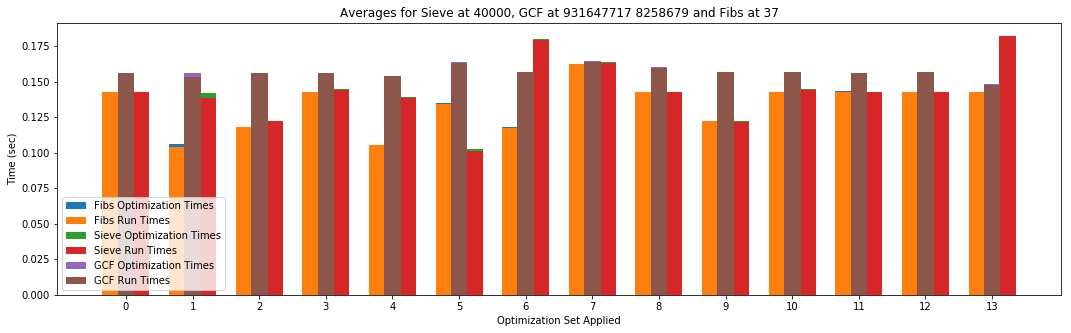

In [38]:
import numpy as np
import matplotlib.pyplot as plt


N = 14
ind = np.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind - (width / 1.1), fibs_opt_times, width, bottom=fibs_run_times)
p2 = plt.bar(ind - (width / 1.1), fibs_run_times, width)

p3 = plt.bar(ind + (width / 1.1), sieve_opt_times, width, bottom=sieve_run_times)
p4 = plt.bar(ind + (width / 1.1), sieve_run_times, width)

p5 = plt.bar(ind, gcf_opt_times, width, bottom=gcf_run_times)
p6 = plt.bar(ind, gcf_run_times, width)

plt.xticks(ind, [i for i in range(14)])
plt.xlabel('Optimization Set Applied')
plt.ylabel('Time (sec)')
plt.title("Averages for Sieve at " + str(sieve_sz) + ", GCF at " + str(gcf_sz1) + " " + str(gcf_sz2) +  " and Fibs at " + str(fibs_sz))

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Fibs Optimization Times', 'Fibs Run Times', 
                                                        "Sieve Optimization Times", "Sieve Run Times",
                                                       "GCF Optimization Times", "GCF Run Times"))

plt.rcParams['figure.figsize'] = [18, 5]


plt.show()